<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-4_n250.csv',
 'data_multi_delta_-4_n120.csv',
 'data_multi_delta_-4_n60.csv',
 'data_multi_delta_-4_n30.csv',
 'data_multi_delta_-4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,52.137109,73.445892,47.625332,-0.000105,183.208228,183.208360,-0.000132
1,0.0,1.0,77.176131,61.552657,96.368892,-0.000155,245.097525,245.097647,-0.000122
2,0.0,2.0,44.200190,94.240934,28.495448,-0.000036,176.936535,176.936556,-0.000020
3,0.0,3.0,86.939773,49.714267,47.155688,-0.000207,193.809520,193.809905,-0.000385
4,0.0,4.0,60.785022,42.068208,84.820274,-0.000402,197.673102,197.673565,-0.000463
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,56.544015,63.310443,77.353687,-0.000107,207.208038,207.208141,-0.000103
119996,999.0,116.0,58.500439,98.146473,29.941180,0.000122,196.588214,196.588052,0.000162
119997,999.0,117.0,28.464715,65.199883,50.462313,0.000556,154.127467,154.126764,0.000703
119998,999.0,118.0,45.399134,24.846920,90.687204,0.000176,170.933435,170.933217,0.000218


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,52.137109,73.445892,47.625332,-0.000105,183.208228,183.208360,-0.000132
1,0.0,1.0,77.176131,61.552657,96.368892,-0.000155,245.097525,245.097647,-0.000122
2,0.0,2.0,44.200190,94.240934,28.495448,-0.000036,176.936535,176.936556,-0.000020
3,0.0,3.0,86.939773,49.714267,47.155688,-0.000207,193.809520,193.809905,-0.000385
4,0.0,4.0,60.785022,42.068208,84.820274,-0.000402,197.673102,197.673565,-0.000463
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,56.544015,63.310443,77.353687,-0.000107,207.208038,207.208141,-0.000103
119996,999.0,116.0,58.500439,98.146473,29.941180,0.000122,196.588214,196.588052,0.000162
119997,999.0,117.0,28.464715,65.199883,50.462313,0.000556,154.127467,154.126764,0.000703
119998,999.0,118.0,45.399134,24.846920,90.687204,0.000176,170.933435,170.933217,0.000218


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    52.137109  73.445892  47.625332  ...  183.208228  183.208360 -0.000132
      1.0    77.176131  61.552657  96.368892  ...  245.097525  245.097647 -0.000122
      2.0    44.200190  94.240934  28.495448  ...  176.936535  176.936556 -0.000020
      3.0    86.939773  49.714267  47.155688  ...  193.809520  193.809905 -0.000385
      4.0    60.785022  42.068208  84.820274  ...  197.673102  197.673565 -0.000463
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  56.544015  63.310443  77.353687  ...  207.208038  207.208141 -0.000103
      116.0  58.500439  98.146473  29.941180  ...  196.588214  196.588052  0.000162
      117.0  28.464715  65.199883  50.462313  ...  154.127467  154.126764  0.000703
      118.0  45.399134  24.846920  90.687204  ...  170.933435  170.933217  0.000218
      119.0  87.246410  53.922620  35.379604  ...  186.548120  186.548711 -0.000591

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    52.137109  73.445892  47.625332  ...  183.208228  183.208360 -0.000132
      1.0    77.176131  61.552657  96.368892  ...  245.097525  245.097647 -0.000122
      2.0    44.200190  94.240934  28.495448  ...  176.936535  176.936556 -0.000020
      3.0    86.939773  49.714267  47.155688  ...  193.809520  193.809905 -0.000385
      4.0    60.785022  42.068208  84.820274  ...  197.673102  197.673565 -0.000463
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  56.544015  63.310443  77.353687  ...  207.208038  207.208141 -0.000103
      116.0  58.500439  98.146473  29.941180  ...  196.588214  196.588052  0.000162
      117.0  28.464715  65.199883  50.462313  ...  154.127467  154.126764  0.000703
      118.0  45.399134  24.846920  90.687204  ...  170.933435  170.933217  0.000218
      119.0  87.246410  53.922620  35.379604  ...  186.548120  186.548711 -0.000591

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,52.137109,73.445892,47.625332,-0.000105,183.208228,183.208360,-0.000132
1,0.0,1.0,77.176131,61.552657,96.368892,-0.000155,245.097525,245.097647,-0.000122
2,0.0,2.0,44.200190,94.240934,28.495448,-0.000036,176.936535,176.936556,-0.000020
3,0.0,3.0,86.939773,49.714267,47.155688,-0.000207,193.809520,193.809905,-0.000385
4,0.0,4.0,60.785022,42.068208,84.820274,-0.000402,197.673102,197.673565,-0.000463
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,56.544015,63.310443,77.353687,-0.000107,207.208038,207.208141,-0.000103
119996,999.0,116.0,58.500439,98.146473,29.941180,0.000122,196.588214,196.588052,0.000162
119997,999.0,117.0,28.464715,65.199883,50.462313,0.000556,154.127467,154.126764,0.000703
119998,999.0,118.0,45.399134,24.846920,90.687204,0.000176,170.933435,170.933217,0.000218


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    52.137109  73.445892  47.625332  ...  183.208228  183.208360 -0.000132
      1.0    77.176131  61.552657  96.368892  ...  245.097525  245.097647 -0.000122
      2.0    44.200190  94.240934  28.495448  ...  176.936535  176.936556 -0.000020
      3.0    86.939773  49.714267  47.155688  ...  193.809520  193.809905 -0.000385
      4.0    60.785022  42.068208  84.820274  ...  197.673102  197.673565 -0.000463
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  56.544015  63.310443  77.353687  ...  207.208038  207.208141 -0.000103
      116.0  58.500439  98.146473  29.941180  ...  196.588214  196.588052  0.000162
      117.0  28.464715  65.199883  50.462313  ...  154.127467  154.126764  0.000703
      118.0  45.399134  24.846920  90.687204  ...  170.933435  170.933217  0.000218
      119.0  87.246410  53.922620  35.379604  ...  186.548120  186.548711 -0.000591

[120000 rows x 7 columns]

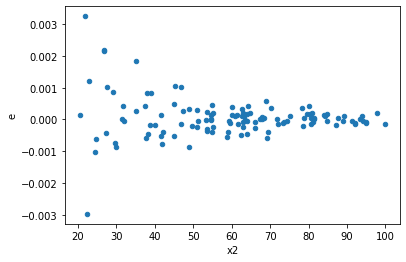

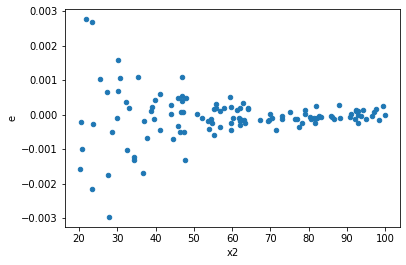

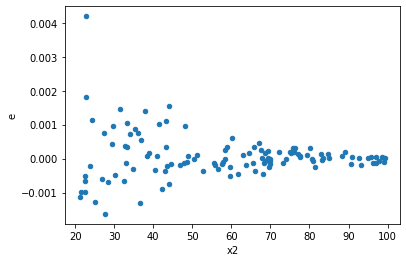

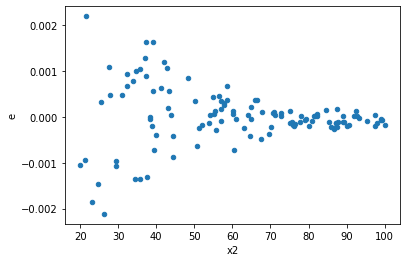

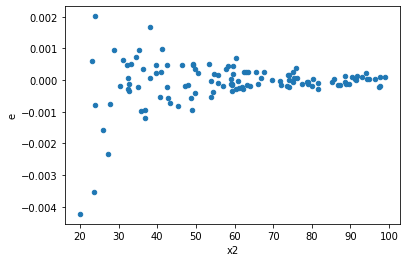

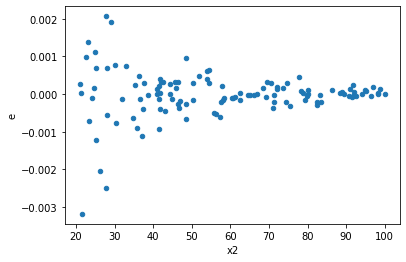

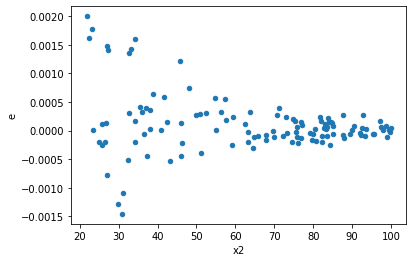

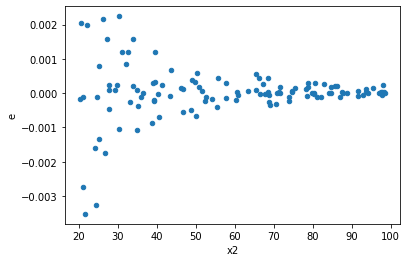

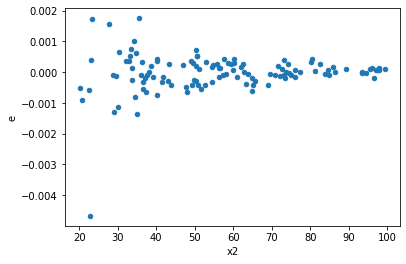

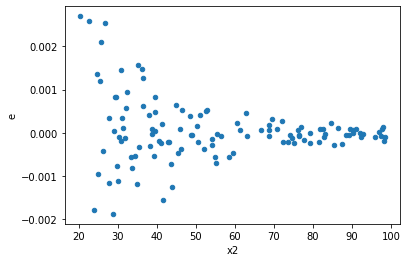

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,4.2286984717396594e-05,2.0169143942732126e-06,9.397107714977021e-07,4.482031987273806e-08,0.0476958668903027,1.0328527627898472e-18,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,4.90223840422428e-05,1.0169002646409706e-06,1.08938631204984e-06,2.2597783658688238e-08,0.020743590596587536,2.3181094816799196e-26,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,4.7982677063545815e-05,1.0665726281848098e-06,1.0662817125232404e-06,2.370161395966244e-08,0.022228285153250104,1.0314661882156443e-25,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,4.147936203777002e-05,5.49802511358284e-07,9.217636008393338e-07,1.2217833585739645e-08,0.013254844924028683,1.3377396601128075e-30,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,5.076350079125214e-05,9.960592868930827e-07,1.1280777953611586e-06,2.2134650819846284e-08,0.019621564142887668,6.955300104385427e-27,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,3.662033815993499e-05,1.2880036330342904e-06,8.137852924429998e-07,2.8622302956317565e-08,0.0351718115602616,1.829234803501043e-21,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,2.398808535466966e-05,7.367489223951837e-07,5.330685634371035e-07,1.6372198275448526e-08,0.030713119096508628,1.0431415912481337e-22,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,6.814783109596444e-05,8.874795920042043e-07,1.5143962465769876e-06,1.972176871120454e-08,0.013022858948430404,9.080650262323078e-31,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,4.1639682024844836e-05,1.904798470209085e-06,9.253262672187742e-07,4.232885489353522e-08,0.04574478904696158,4.372438602234368e-19,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64